In [39]:
import pandas as pd

# Load your datasets
multipliers_df = pd.read_csv('multipliers.csv')
aviator_df = pd.read_csv('aviator_dataset_clean.csv')

# Quick preview of the datasets
print(multipliers_df.head(10))
print(aviator_df.head(10))


   Multiplier
0        2.80
1        6.55
2        1.10
3        1.06
4        1.88
5        1.89
6        2.36
7        8.23
8        1.76
9        1.68
   color  mean   var  next_approximate  target
0      1  1.41  1.41              2.82    2.80
1      1  4.67  2.70              7.38    6.55
2      0  3.83  1.71              5.54    1.10
3      0  1.08  1.79              2.87    1.06
4      0  1.47  1.47              2.94    1.88
5      0  1.88  1.25              3.13    1.89
6      1  2.12  1.17              3.30    2.36
7      1  5.29  3.72              9.02    8.23
8      0  5.00  3.20              8.19    1.76
9      0  1.72  1.33              3.05    1.68


In [40]:
# Define the features and target
X = aviator_df.drop(columns=['target'])  # Use all columns except 'target' as features
y = aviator_df['target']  # Set 'target' as the value to predict


In [41]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(529667, 4)

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.5231777180207333
Mean Squared Error: 0.7837991232793462
R-squared: 0.77142676644468


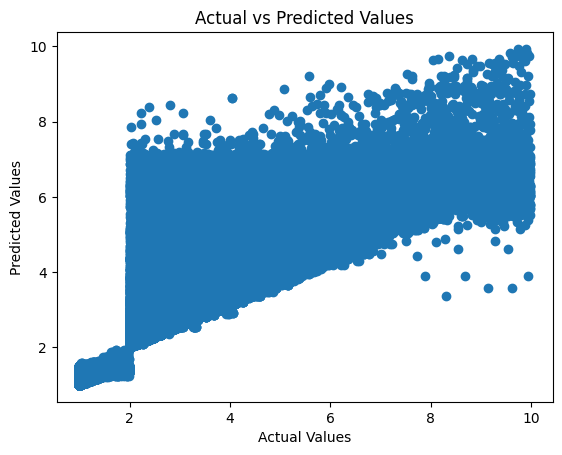

In [44]:
import matplotlib.pyplot as plt

# Plotting the true values vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


   Multiplier
0        2.80
1        6.55
2        1.10
3        1.06
4        1.88
5        1.89
6        2.36
7        8.23
8        1.76
9        1.68
   color  mean   var  next_approximate  target
0      1  1.41  1.41              2.82    2.80
1      1  4.67  2.70              7.38    6.55
2      0  3.83  1.71              5.54    1.10
3      0  1.08  1.79              2.87    1.06
4      0  1.47  1.47              2.94    1.88
5      0  1.88  1.25              3.13    1.89
6      1  2.12  1.17              3.30    2.36
7      1  5.29  3.72              9.02    8.23
8      0  5.00  3.20              8.19    1.76
9      0  1.72  1.33              3.05    1.68
Mean Absolute Error: 0.5231777180207333
Mean Squared Error: 0.7837991232793462
R-squared: 0.77142676644468


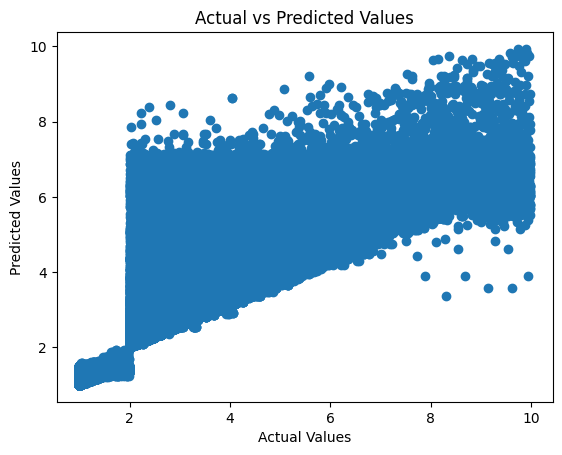

Predicted next Multiplier: 2.0


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your datasets
multipliers_df = pd.read_csv('multipliers.csv')
aviator_df = pd.read_csv('aviator_dataset_clean.csv')

# Quick preview of the datasets
print(multipliers_df.head(10))
print(aviator_df.head(10))

# Define the features and target
X = aviator_df.drop(columns=['target'])  # Use all columns except 'target' as features
y = aviator_df['target']  # Set 'target' as the value to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting the true values vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Example real-time data with all features (excluding 'Multiplier')
real_time_data = [
    [0, 1.41, 1.41, 2.82],  # [Color, Mean, Var, Next_approximate]
    [0, 4.67, 2.70, 7.38],
    [1, 3.83, 1.71, 5.54],
    [0, 1.08, 1.79, 2.87],
    [1, 1.47, 1.47, 2.94]
]

# Define column names (excluding 'Multiplier' for prediction)
columns = ['color', 'mean', 'var', 'next_approximate']

# Convert real-time data into a DataFrame with the correct column names
real_time_data_df = pd.DataFrame(real_time_data, columns=columns)

# Predict the next multiplier using the trained model
next_prediction = model.predict(real_time_data_df)

# Print the predicted next multiplier
print("Predicted next Multiplier:", next_prediction[-1])  # Displaying only the last predicted value


In [60]:
print(multipliers_df.columns)  # To check column names in your training data
print(real_time_data_df.columns)  # To check column names in your prediction data


Index(['Multiplier'], dtype='object')
Index(['color', 'mean', 'var', 'next_approximate'], dtype='object')
